@author: Octavio Gutiérrez de Código Máquina

URL del canal: https://www.youtube.com/CodigoMaquina

URL del video: https://youtu.be/kInYC2l_W4M

<h1 style="color:purple" align="left">Clustering vía Propagación de Afinidad</h1>
<h1 style="color:IndianRed">Affinity Propagation: Contexto y Datos</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation

datos = {"alan" : [2, 4],
         "alberto" : [3, 3],
         "alex" : [3, 2], 
         "zelda" : [7, 6], 
         "zoila" : [6, 7], 
         "zulema" : [6, 8]}

personas = set(datos.keys())
datos = pd.DataFrame(datos, index=["ahorro", "evaluacion"])
datos

,alan,alberto,alex,zelda,zoila,zulema
ahorro,2,3,3,7,6,6
evaluacion,4,3,2,6,7,8


<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>
<h1 style="color:purple" align="left">Visualización de Datos</h1>

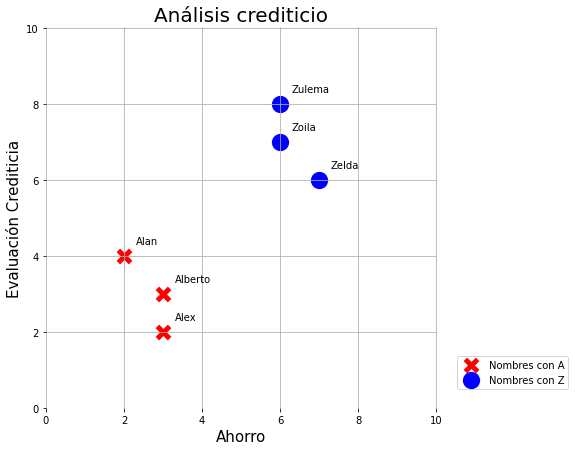

In [2]:
plt.figure(figsize=(7, 7))
plt.title("Análisis crediticio", fontsize=20)

plt.scatter(datos.T[0:3]["ahorro"], 
            datos.T[0:3]["evaluacion"], 
            marker="x", s=150, color="red",
            linewidths=5, label="Nombres con A")

plt.scatter(datos.T[3:]["ahorro"], 
            datos.T[3:]["evaluacion"], 
            marker="o", s=150, color="blue",
            linewidths=5, label="Nombres con Z")

for i in range(len(datos.columns)):
    plt.text(datos[datos.columns[i]][0]+0.3, 
             datos[datos.columns[i]][1]+0.3, 
             datos.columns[i].capitalize())
    
plt.xlabel("Ahorro", fontsize=15)
plt.ylabel("Evaluación Crediticia", fontsize=15)
plt.legend(bbox_to_anchor=(1.35, 0.15))
plt.box(False)
plt.xlim((0, 10.01))
plt.ylim((0, 10.01))
plt.grid()
plt.show()

<h3><span style="color:purple" align="left">Affinity Propagation:</span> <span style="color:IndianRed" align="left"> Maximizar la similitud total entre los puntos y sus <span style="color:purple" align="left">Ejemplares</span></span></h3>

<br><br><br><br><br><br><br><br><br><br><br><br>
<h1 style="color:purple" align="left">Matrices para la Propagación de Afinidad</h1>
<ul>
  <li><h2 style="color:IndianRed">s : Similitud <span style="color:black">(Entrada)</span></h2></li>
  <li><h2 style="color:IndianRed">r : Responsabilidad</h2></li>
  <li><h2 style="color:IndianRed">d : Disponibilidad</h2></li>
  <li><h2 style="color:IndianRed">a : Asignaciones <span style="color:black">(Salida)</span></h2></li>
</ul>
<br><br><br><br><br><br><br><br><br><br><br><br>

<h1 style="color:purple" align="left">Similitud entre dos puntos i, k</h1>
<h2 style="color:purple" align="left">Métrica: <span style="color:IndianRed">Distancia euclidiana al cuadrado</span></h2>

In [3]:
datos

,alan,alberto,alex,zelda,zoila,zulema
ahorro,2,3,3,7,6,6
evaluacion,4,3,2,6,7,8


In [4]:
print("Similitud entre Alan y Alberto", -((datos["alan"] - datos["alberto"])**2).sum())
print("Similitud entre Alan y Zulema", -((datos["alan"] - datos["zulema"])**2).sum())

Similitud entre Alan y Alberto -2
Similitud entre Alan y Zulema -32


<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>
<h1 style="color:purple" align="left">Creación de <span style="color:IndianRed">Matriz de Similitud</span> para i != k </h1>

In [5]:
s = pd.DataFrame(0, columns=datos.columns, index=datos.columns) 

for i in personas:
    for k in personas:
        s.loc[i, k] = -((datos[i] - datos[k])**2).sum()

s

,alan,alberto,alex,zelda,zoila,zulema
alan,0,-2,-5,-29,-25,-32
alberto,-2,0,-1,-25,-25,-34
alex,-5,-1,0,-32,-34,-45
zelda,-29,-25,-32,0,-2,-5
zoila,-25,-25,-34,-2,0,-1
zulema,-32,-34,-45,-5,-1,0


<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>
<h2 style="color:purple" align="left">Preferencia a priori de cada punto como <span style="color:IndianRed">Ejemplar</span></h2>
 

In [6]:
np.fill_diagonal(s.values, np.min(s.values))

s

,alan,alberto,alex,zelda,zoila,zulema
alan,-45,-2,-5,-29,-25,-32
alberto,-2,-45,-1,-25,-25,-34
alex,-5,-1,-45,-32,-34,-45
zelda,-29,-25,-32,-45,-2,-5
zoila,-25,-25,-34,-2,-45,-1
zulema,-32,-34,-45,-5,-1,-45


<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>
<h1 style="color:purple" align="left">Mensajes de Disponibilidad</h1>
<h2 style="color:IndianRed" align="left">Evidencia de qué tan adecuado es
el emisor como <span style="color:purple">Ejemplar</span></h2>

In [7]:
# Matriz de Disponibilidad
d = pd.DataFrame(0, columns=datos.columns, index=datos.columns) 

d

,alan,alberto,alex,zelda,zoila,zulema
alan,0,0,0,0,0,0
alberto,0,0,0,0,0,0
alex,0,0,0,0,0,0
zelda,0,0,0,0,0,0
zoila,0,0,0,0,0,0
zulema,0,0,0,0,0,0


<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>    
<h1 style="color:purple" align="left">Mensajes de Responsabilidad</h1>
<h2 style="color:IndianRed" align="left">Evidencia de qué tan adecuado es
el receptor como <span style="color:purple">Ejemplar</span></h2>

In [8]:
# La responsabilidad se actualiza a partir de la similitud y la disponibilidad
s

,alan,alberto,alex,zelda,zoila,zulema
alan,-45,-2,-5,-29,-25,-32
alberto,-2,-45,-1,-25,-25,-34
alex,-5,-1,-45,-32,-34,-45
zelda,-29,-25,-32,-45,-2,-5
zoila,-25,-25,-34,-2,-45,-1
zulema,-32,-34,-45,-5,-1,-45


In [9]:
# Responsabilidad ["alan", "alberto"]

sim = s.loc["alan", "alberto"]

sim_otros = s.loc["alan", ["alan", "alex", "zelda", "zoila", "zulema"]]

dis_otros = d.loc["alan", ["alan", "alex", "zelda", "zoila", "zulema"]]

print("Qué tan adecuado es Alberto como EJEMPLAR para Alan:", sim - max(sim_otros + dis_otros)) 


sim = s.loc["alan", "zulema"]

sim_otros = s.loc["alan", ["alan", "alberto", "alex", "zelda", "zoila"]]

dis_otros = d.loc["alan", ["alan", "alberto", "alex", "zelda", "zoila"]]

# Responsabilidad ["alan", "zulema"]

print("Qué tan adecuada es Zulema como EJEMPLAR para Alan:", sim - max(sim_otros + dis_otros)) 


Qué tan adecuado es Alberto como EJEMPLAR para Alan: 3
Qué tan adecuada es Zulema como EJEMPLAR para Alan: -30


<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>
<h1 style="color:purple" align="left">Algoritmo Principal - Actualización de Matrices:</h1>
<ul>
  <li><h2 style="color:IndianRed">r : Responsabilidad</h2></li>
  <li><h2 style="color:IndianRed">d : Disponibilidad</h2></li>
  <li><h2 style="color:IndianRed">a : Asignaciones</h2></li>
</ul>  

In [10]:
# Matriz de Responsabilidad
r = pd.DataFrame(0, columns=datos.columns, index=datos.columns) 


for i in range(10):

    factor = 0.5

    # Actualización de Responsabilidades
    
    r_anterior = r.copy()

    for i in personas:
        for k in personas:
            elegibles = list(personas.difference({k}))
            r.loc[i, k] = s.loc[i, k] - max(s.loc[i, elegibles] + d.loc[i, elegibles])  
    
    r = (1 - factor)*r + factor*r_anterior
    

    # Actualización de Disponibilidades
    
    d_anterior = d.copy()

    for i in personas:
        for k in personas:
            if i == k:
                elegibles = list(personas.difference({i}))
                d.loc[k, k] = r.loc[elegibles, k][r.loc[elegibles, k] > 0].sum()
            else:
                elegibles = list(personas.difference({i, k}))
                d.loc[i, k] = min(0, r.loc[k, k] + r.loc[elegibles, k][r.loc[elegibles, k] > 0].sum())

    d = (1 - factor)*d + factor*d_anterior
    
    # Actualización de Asignaciones 
    
    a = r + d

<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>
<h1 style="color:purple" align="left">Matriz de Asignaciones</h1>

In [11]:
np.set_printoptions(precision=2)
print("Máximos", a.max(1).values) 
print("Posición de los máximos", np.argmax(a.values, axis=1))
a.round(decimals=2)

Máximos [21.63 25.59 26.4  21.63 25.59 26.4 ]
Posición de los máximos [1 1 1 4 4 4]


,alan,alberto,alex,zelda,zoila,zulema
alan,-31.67,21.63,-30.44,-54.04,-20.28,-55.87
alberto,-32.36,25.59,-31.23,-48.59,-18.82,-56.41
alex,-31.62,26.40,-30.64,-56.80,-29.03,-68.62
zelda,-54.04,-20.28,-55.87,-31.67,21.63,-30.44
zoila,-48.59,-18.82,-56.41,-32.36,25.59,-31.23
zulema,-56.80,-29.03,-68.62,-31.62,26.40,-30.64


<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>
<h1 style="color:purple" align="left">Propagación de afinidad con <span style="color:IndianRed">Scikit-Learn</span></h1>

In [12]:
clustering = AffinityPropagation(random_state=None).fit(datos.T.values)
print("Etiquetas de Clusters:", clustering.labels_)
print("Índices de Centroides:", clustering.cluster_centers_indices_)

Etiquetas de Clusters: [0 0 0 1 1 1]
Índices de Centroides: [1 4]
